# Transfer Learning with Dogs vs. Cats Dataset

This notebook demonstrates how to use transfer learning for image classification using the Dogs vs. Cats dataset from Kaggle.

In [1]:
# installing the Kaggle library
!pip install kaggle
# Installs the Kaggle API Python package

## Step 1: Install and Set Up Kaggle API

We begin by installing the Kaggle API and configuring access using your `kaggle.json` file.

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# Create the .kaggle directory and copy the kaggle.json credentials file

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats
# Downloads the Dogs vs. Cats dataset into the current directory

 98% 792M/812M [00:04<00:00, 84.2MB/s]
100% 812M/812M [00:04<00:00, 190MB/s] 


## Step 2: Download the Dataset from Kaggle

We download the Dogs vs. Cats dataset using the Kaggle API.

In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


## Step 3: Extract the Dataset

After downloading, we extract the dataset from the ZIP archive.

In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')
# Use the ZipFile module to extract the dataset archive

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')
# Use the ZipFile module to extract the dataset archive

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.1656.jpg', 'cat.12022.jpg', 'dog.4851.jpg', 'dog.7871.jpg', 'cat.195.jpg', 'dog.663.jpg', 'cat.485.jpg', 'dog.6217.jpg', 'dog.994.jpg', 'cat.2070.jpg', 'cat.6384.jpg', 'dog.4268.jpg', 'cat.2780.jpg', 'dog.12005.jpg', 'cat.1.jpg', 'cat.9826.jpg', 'dog.6482.jpg', 'dog.6991.jpg', 'cat.371.jpg', 'cat.10330.jpg', 'cat.8250.jpg', 'dog.5578.jpg', 'cat.5520.jpg', 'cat.2008.jpg', 'cat.1978.jpg', 'dog.6427.jpg', 'dog.9930.jpg', 'cat.5417.jpg', 'cat.6956.jpg', 'cat.6306.jpg', 'dog.1957.jpg', 'dog.12073.jpg', 'dog.8810.jpg', 'cat.1781.jpg', 'cat.1404.jpg', 'cat.10803.jpg', 'dog.9988.jpg', 'cat.10702.jpg', 'cat.5469.jpg', 'cat.10957.jpg', 'cat.869.jpg', 'cat.3971.jpg', 'cat.3779.jpg', 'dog.9869.jpg', 'dog.11479.jpg', 'dog.34.jpg', 'dog.11161.jpg', 'cat.2407.jpg', 'cat.4233.jpg', 'cat.9517.jpg', 'dog.6160.jpg', 'dog.5060.jpg', 'dog.1658.jpg', 'cat.2963.jpg', 'cat.6603.jpg', 'cat.503.jpg', 'cat.9927.jpg', 'cat.7885.jpg', 'cat.7022.jpg', 'dog.12169.jpg', 'cat.10634.jpg', 'dog.7420.jpg', 'cat.553

## Step 4: Description of Imports
*   **numpy:** Fundamental package for numerical computations in Python, widely used for working with arrays
*   **PIL.Image:** Provides image processing capabilities, such as opening, manipulating, and saving many different image file formats.
*   **matplotlib.pyplot & matplotlib.image:** Used for plotting images and graphs to visualize data.
*   **sklearn.model_selection.train_test_split:** Splits arrays or matrices into random train and test subsets, essential for machine learning workflows.
*   **cv2_imshow (Colab specific):** Allows displaying OpenCV images in Google Colab notebooks (OpenCV’s default imshow does not work directly in Colab).


In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

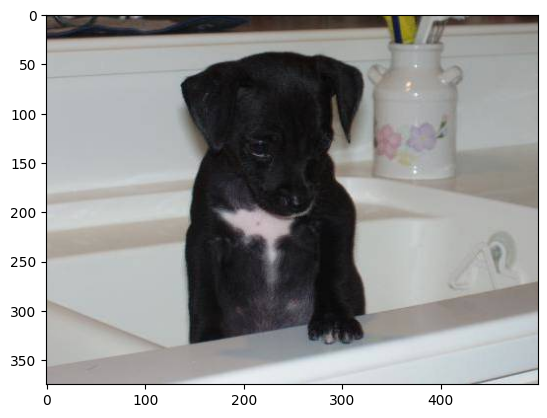

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

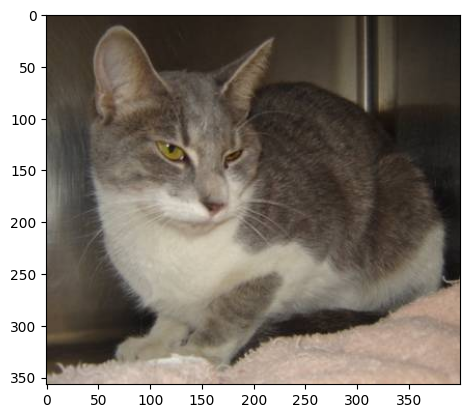

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
cat
dog
dog
cat


In [13]:
# COunting number of dog and cat images
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [15]:
# Resizing the images in train folder
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

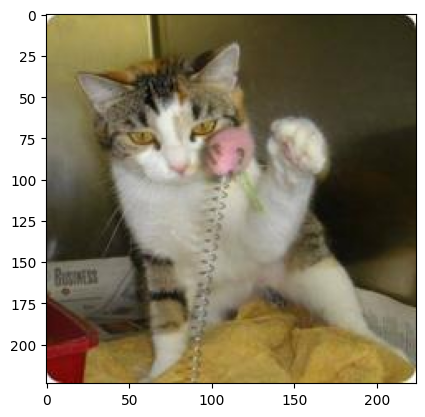

In [16]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10047.jpg')
imgplt = plt.imshow(img)
plt.show()

In [17]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [18]:
print(filenames[0:5])
print(len(filenames))

['cat.1656.jpg', 'cat.12022.jpg', 'dog.4851.jpg', 'dog.7871.jpg', 'cat.195.jpg']
2000


In [19]:

print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 0]
2000


In [20]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1010  990]


In [21]:
import cv2
import glob

This script loads all **.png** and **.jpg** images from a specified directory (**/content/image resized/**), reads them using OpenCV (**cv2.imread**), and stores them in a NumPy array. It's typically used as a preprocessing step to prepare image data for tasks like training a machine learning model. The use of **glob** allows flexible file searching, and storing images in an array enables batch processing.

In [22]:
# Directory where the resized images are stored
image_directory = '/content/image resized/'

# List of image file extensions to look for
image_extension = ['png', 'jpg']

# Initialize an empty list to store file paths
files = []

# Use glob to find all files in the directory with the specified extensions
# This creates a combined list of .png and .jpg image file paths
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

# Read all image files using OpenCV and convert the list to a NumPy array
# Each image is read into an array and stacked into one large array
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [23]:
print(dog_cat_images)

[[[[202 197 198]
   [226 221 222]
   [211 206 207]
   ...
   [141 152 160]
   [114 125 133]
   [108 119 127]]

  [[211 206 207]
   [227 222 223]
   [211 206 207]
   ...
   [138 149 157]
   [100 111 119]
   [ 76  87  95]]

  [[212 207 208]
   [222 217 218]
   [205 200 201]
   ...
   [150 159 168]
   [105 114 123]
   [ 93 102 111]]

  ...

  [[206 210 215]
   [186 190 195]
   [167 171 176]
   ...
   [197 200 205]
   [189 192 197]
   [186 189 194]]

  [[180 184 189]
   [181 185 190]
   [181 187 192]
   ...
   [196 199 204]
   [192 195 200]
   [192 195 200]]

  [[153 157 162]
   [176 180 185]
   [194 200 205]
   ...
   [202 205 210]
   [202 205 210]
   [205 208 213]]]


 [[[202 197 194]
   [200 195 192]
   [200 195 192]
   ...
   [ 91  98 101]
   [105 112 115]
   [114 121 124]]

  [[202 197 194]
   [203 198 195]
   [204 199 196]
   ...
   [ 45  52  55]
   [ 51  58  61]
   [ 56  63  66]]

  [[204 199 196]
   [207 202 199]
   [208 203 200]
   ...
   [ 22  30  30]
   [ 25  33  33]
   [ 27  35

In [24]:
type(dog_cat_images)

numpy.ndarray

In [25]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


## Step 4: Train test data split for training and testing

In [26]:
# Assign image data and labels to `X` and `Y` for machine learning tasks

# Image data (features)
X = dog_cat_images

# Corresponding labels for each image
Y = np.asarray(labels)

This line splits the image data (X) and labels (Y) into training and testing subsets using train_test_split from Scikit-learn.

* **test_size=0.2** means 20% of the data is reserved for testing.

* **random_state=2** ensures reproducibility of the split.

In [27]:
# We divide the data into training and testing subsets to evaluate model performance.
# Split image data and labels into 80% training and 20% testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [29]:
# scaling the data
# Pixel values in images range from 0 to 255. We scale them to a 0–1 range for better model performance.
# Normalize pixel values to the range [0, 1]

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [30]:
print(X_train_scaled)

[[[[1.         1.         0.96078431]
   [1.         1.         0.96078431]
   [1.         0.99215686 0.97647059]
   ...
   [0.98039216 1.         0.98823529]
   [0.98039216 1.         0.96862745]
   [0.96862745 1.         0.94509804]]

  [[1.         1.         0.96862745]
   [1.         1.         0.96470588]
   [1.         0.99215686 0.97647059]
   ...
   [0.95294118 0.98431373 0.98039216]
   [0.95294118 0.99607843 0.95686275]
   [0.94509804 0.99607843 0.94117647]]

  [[1.         1.         0.97254902]
   [1.         1.         0.96862745]
   [1.         0.98431373 0.98039216]
   ...
   [0.9254902  0.95294118 0.98823529]
   [0.92156863 0.96862745 0.96862745]
   [0.93333333 0.98823529 0.97254902]]

  ...

  [[0.36078431 0.37254902 0.42745098]
   [0.34901961 0.36078431 0.41568627]
   [0.3254902  0.3372549  0.39215686]
   ...
   [0.40784314 0.40784314 0.47058824]
   [0.41176471 0.41176471 0.48235294]
   [0.41568627 0.41568627 0.48627451]]

  [[0.35686275 0.37254902 0.41568627]
   [0.3

## This code imports TensorFlow and TensorFlow Hub:

**tensorflow (tf):** A powerful open-source machine learning framework used for building and training neural networks.

**tensorflow_hub (hub):** A library that enables the reuse of machine learning models (or parts of models) published on TensorFlow Hub, including pre-trained image classifiers and text embeddings.

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

This code loads a pre-trained MobileNetV2 model from TensorFlow Hub and wraps it in a KerasLayer. The model is set to be non-trainable, meaning its weights will remain frozen during training, making it ideal for feature extraction.

In [32]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [33]:
!pip install tf_keras
import tf_keras

# Number of output classes (e.g., 2 classes for binary classification)
num_of_classes = 2

# Define the model using Keras' Sequential API
model = tf_keras.Sequential([
    # Use the pre-trained MobileNetV2 feature extractor
    pretrained_model,
    # Add a fully connected Dense layer for classification
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


This code compiles the model by:

**Choosing the optimizer:** Adam optimizer is used, which is well-suited for many types of neural networks.

**Setting the loss function:** SparseCategoricalCrossentropy is used for multi-class classification problems (with integer labels).

**Defining evaluation metrics:** The accuracy (acc) metric is used to track model performance.x`

In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [35]:
# We train the model using the scaled training data for a specified number of epochs.
# Train the model for 5 epochs with the scaled training data and labels

model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 73s 1s/step - loss: 0.2165 - acc: 0.9112
Epoch 2/5
50/50 [==============================] - 58s 1s/step - loss: 0.0799 - acc: 0.9719
Epoch 3/5
50/50 [==============================] - 55s 1s/step - loss: 0.0577 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 55s 1s/step - loss: 0.0470 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 55s 1s/step - loss: 0.0411 - acc: 0.9856


This code evaluates the trained model's performance on the **test dataset (X_test_scaled and Y_test)** by calculating the loss and accuracy. The evaluate function returns these values, which are printed to assess the model's generalization ability.

In [36]:
# After training the model, we evaluate its performance on the test dataset to check how well it generalizes.

# Evaluate the model's performance on the test set
score, acc = model.evaluate(X_test_scaled, Y_test)

# Print the test loss and test accuracy
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 27s 2s/step - loss: 0.0548 - acc: 0.9775
Test Loss = 0.05481680855154991
Test Accuracy = 0.9775000214576721


This code takes an input image path, processes the image (resizes, scales, reshapes), and then uses the trained model to predict whether the image is a **cat** or **dog**. The prediction is printed as a label (0 for cat, 1 for dog).
 *  **input_image_path:** The path where the user inputs the image file.
 *  **Resizing and Scaling:** The image is resized to 224x224 pixels, which is the expected input size for MobileNetV2. Pixel values are normalized to the [0, 1] range.
 *  **np.argmax():** Finds the index of the highest value in the prediction output, which corresponds to the predicted class label.
 *  **Model Prediction:** model.predict() outputs probabilities for each class. The model's prediction is the class with the highest probability.
 *  **Class Mapping:** The model is assumed to classify between 0 (cat) and 1 (dog).

Path of the image to be predicted: /content/image resized/cat.10047.jpg


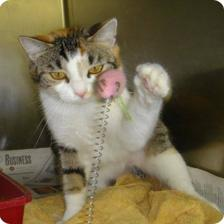

1/1 [==============================] - 1s 684ms/step
[[ 4.0638843 -3.6940014]]
0
The image represents a Cat


In [37]:
# This code allows the user to input an image path and predicts if the image represents a **cat** or **dog** using the trained model.

## Take the path of the image to be predicted as input from the user
input_image_path = input('Path of the image to be predicted: ')

# Read the image from the given path
input_image = cv2.imread(input_image_path)

# Display the input image
cv2_imshow(input_image)

# Resize the image to 224x224 (input shape expected by MobileNetV2)
input_image_resize = cv2.resize(input_image, (224,224))

# Scale the pixel values to [0, 1]
input_image_scaled = input_image_resize/255

# Reshape the image to the required input shape [1, 224, 224, 3]
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

# Predict the class of the input image
input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

# Check the predicted label and print the corresponding class
if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/train/dog.8298.jpg


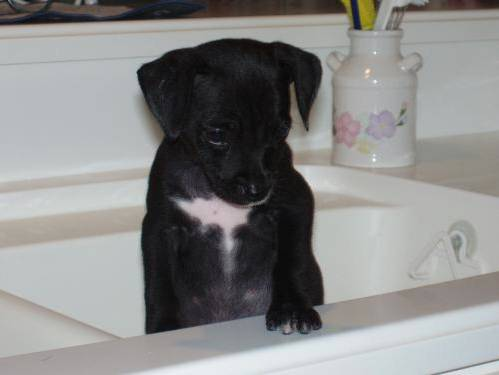

1/1 [==============================] - 0s 93ms/step
[[-0.21699384  0.8208568 ]]
1
The image represents a Dog


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/train/cat.10002.jpg


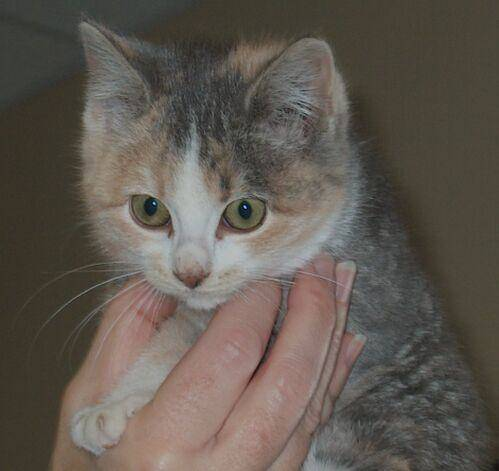

1/1 [==============================] - 0s 61ms/step
[[ 6.200423  -3.6623306]]
0
The image represents a Cat


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/train/cat.10030.jpg


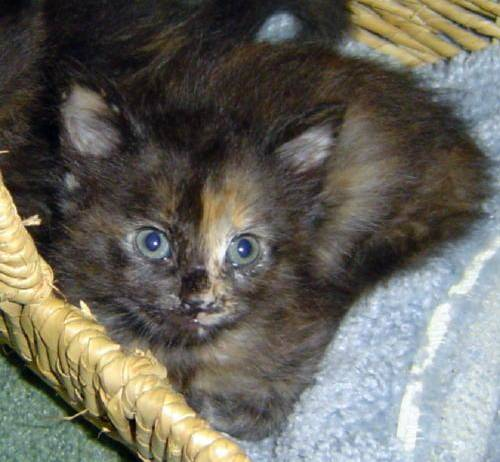

1/1 [==============================] - 0s 98ms/step
[[ 4.42109  -3.191907]]
0
The image represents a Cat


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [41]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')
# Use the ZipFile module to extract the dataset archive

The dataset is extracted


Path of the image to be predicted: /content/test1/1002.jpg


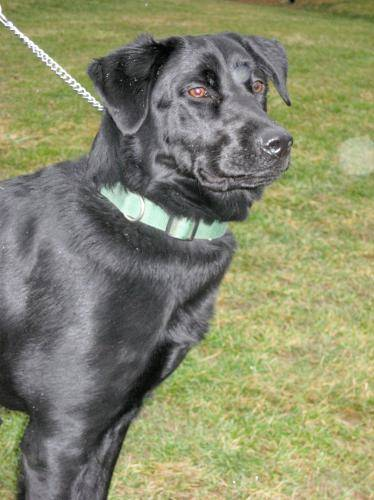

1/1 [==============================] - 0s 58ms/step
[[-3.6531959  3.291312 ]]
1
The image represents a Dog


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/test1/10103.jpg


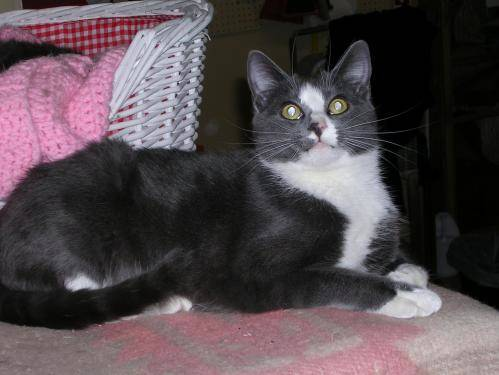

1/1 [==============================] - 0s 49ms/step
[[ 5.824165  -5.9050055]]
0
The image represents a Cat


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')